### Análise exploratória de dados

Nesse notebook geramos as estatísticas descritivas antes da modelagem.

In [1]:
from utils.load_csv import load_csv
from utils.save_graph import save_graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = load_csv('dados_limpos.csv')

In [3]:
df.head()

,ano_censo,sigla_uf,nome_municipio,codigo_municipio,codigo_escola,nome_escola,qtd_turmas_ed_basica,qtd_matr_ed_basica,qtd_matr_medio,qtd_matr_fundamental,...,primeiro_ano_integral_medio,ultimo_ano_integral_medio,anos_integral_medio,ofertou_integral_de_forma_continua,prop_matriculas_medio_integral,cem_por_cento_medio_integral,ofertou_integral_ate_2018,tratamento,qtd_anos_ofertou_integral_medio,qtd_anos_continuos_ofertou_integral_medio
0,2011,SP,adamantina,3500105,35030806,helen keller,25,830,447,303,...,NaN,NaN,NaN,False,0.0,False,False,False,0,0
1,2011,SP,adamantina,3500105,35031045,durvalino grion prof,22,771,275,496,...,NaN,NaN,NaN,False,0.0,False,False,False,0,0
2,2011,SP,adolfo,3500204,35027352,odila bovolenta de mendonca profa,6,156,156,0,...,NaN,NaN,NaN,False,0.0,False,False,False,0,0
3,2011,SP,aguai,3500303,35020527,geraldo lourenco padre,33,1106,508,598,...,2016.0,2017.0,"2016,2017",True,0.0,False,True,False,2,2
4,2011,SP,aguai,3500303,35020722,egle luporini costa profa,18,641,365,276,...,NaN,NaN,NaN,False,0.0,False,False,False,0,0


Agrupando se é PEI (tratamento), apenas integral ou se não possui integral

In [4]:
df['integral_geral_nao_tratamento'] = df['possui_integral'] & ~df['tratamento']

In [5]:
df['integral_medio_nao_tratamento'] = df['possui_integral_medio'] & ~df['tratamento']

In [6]:
def definir_grupo(row):

    if row['tratamento']:
        return 'PEI'
    elif row['integral_geral_nao_tratamento']:
        return 'Integral mas não PEI'
    
    return 'Sem integral'

In [7]:
df['grupo'] = df.apply(
    definir_grupo, axis =1 
)

In [8]:
df.columns

Index(['ano_censo', 'sigla_uf', 'nome_municipio', 'codigo_municipio',
       'codigo_escola', 'nome_escola', 'qtd_turmas_ed_basica',
       'qtd_matr_ed_basica', 'qtd_matr_medio', 'qtd_matr_fundamental',
       'qtd_matr_ed_basica_nao_declarada', 'qtd_matr_ed_basica_branca',
       'qtd_matr_ed_basica_preta', 'qtd_matr_ed_basica_parda',
       'qtd_matr_ed_basica_amarela', 'qtd_matr_ed_basica_indigena',
       'qtd_matriculas_fundamental_integral',
       'qtd_matriculas_fundamental_anos_iniciais_integral',
       'qtd_matriculas_fundamental_anos_finais_integral',
       'qtd_matriculas_medio_integral', 'coordenadas', 'is_PEI', '_merge',
       'total_matriculas_basica_integral', 'possui_integral',
       'total_matriculas_fundamental_integral', 'possui_integral_medio',
       'is_PEI_and_possui_medio_integral', 'primeiro_ano_integral_medio',
       'ultimo_ano_integral_medio', 'anos_integral_medio',
       'ofertou_integral_de_forma_continua', 'prop_matriculas_medio_integral',
       

In [9]:
df['qtd_matriculas_ppi_basica'] = df[['qtd_matr_ed_basica_preta', 'qtd_matr_ed_basica_parda','qtd_matr_ed_basica_indigena']].sum(axis=1)

In [10]:
df['proporcao_matriculas_ppi_basica'] = df['qtd_matriculas_ppi_basica'] / df['qtd_matr_ed_basica']

In [11]:
df['proporcao_matriculas_ppi_basica'].min()

np.float64(0.0)

In [12]:
(df['proporcao_matriculas_ppi_basica']==0).sum()

np.int64(3)

In [13]:
df['proporcao_matriculas_ppi_basica'].max()

np.float64(1.0)

In [14]:
df.groupby('grupo').size()

grupo
Integral mas não PEI     6882
PEI                       772
Sem integral            21903
dtype: int64

In [15]:
prop_ppi_por_grupo_ano = df.groupby(['grupo', 'ano_censo'])[['proporcao_matriculas_ppi_basica']].mean().reset_index()

In [16]:
prop_ppi_por_grupo_ano

,grupo,ano_censo,proporcao_matriculas_ppi_basica
0,Integral mas não PEI,2011,0.264636
1,Integral mas não PEI,2012,0.282144
2,Integral mas não PEI,2013,0.283046
3,Integral mas não PEI,2014,0.271181
4,Integral mas não PEI,2015,0.279722
5,Integral mas não PEI,2016,0.276989
6,Integral mas não PEI,2017,0.274528
7,Integral mas não PEI,2018,0.265991
8,PEI,2012,0.230471
9,PEI,2013,0.245974


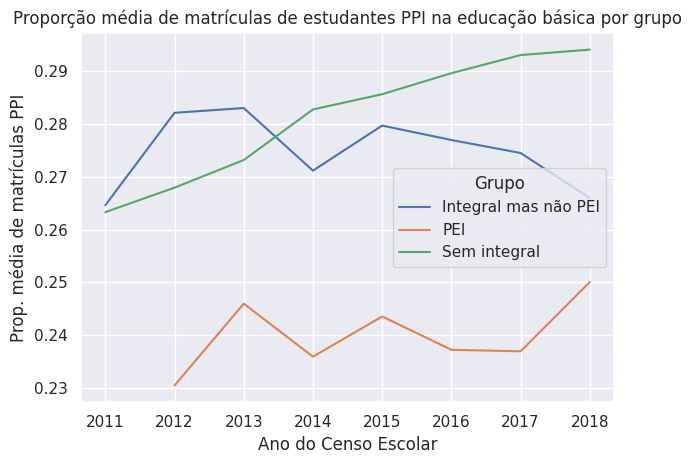

In [17]:
fig, ax = plt.subplots()

for nome_grupo, grupo_df in prop_ppi_por_grupo_ano.groupby('grupo'):
    grupo_df.plot.line(
        x='ano_censo',
        y='proporcao_matriculas_ppi_basica',
        ax=ax,
        label=nome_grupo
    )

ax.set_title('Proporção média de matrículas de estudantes PPI na educação básica por grupo')
ax.set_xlabel('Ano do Censo Escolar')
ax.set_ylabel('Prop. média de matrículas PPI')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

save_graph(
    fig,
    'proporcao_matriculas_ppi_por_grupo_ano.png',
)

### vamos fazer o mesmo gráfico mas considerando apenas as escolas que ofertam 100% ensino médio

In [18]:
df.columns

Index(['ano_censo', 'sigla_uf', 'nome_municipio', 'codigo_municipio',
       'codigo_escola', 'nome_escola', 'qtd_turmas_ed_basica',
       'qtd_matr_ed_basica', 'qtd_matr_medio', 'qtd_matr_fundamental',
       'qtd_matr_ed_basica_nao_declarada', 'qtd_matr_ed_basica_branca',
       'qtd_matr_ed_basica_preta', 'qtd_matr_ed_basica_parda',
       'qtd_matr_ed_basica_amarela', 'qtd_matr_ed_basica_indigena',
       'qtd_matriculas_fundamental_integral',
       'qtd_matriculas_fundamental_anos_iniciais_integral',
       'qtd_matriculas_fundamental_anos_finais_integral',
       'qtd_matriculas_medio_integral', 'coordenadas', 'is_PEI', '_merge',
       'total_matriculas_basica_integral', 'possui_integral',
       'total_matriculas_fundamental_integral', 'possui_integral_medio',
       'is_PEI_and_possui_medio_integral', 'primeiro_ano_integral_medio',
       'ultimo_ano_integral_medio', 'anos_integral_medio',
       'ofertou_integral_de_forma_continua', 'prop_matriculas_medio_integral',
       

In [19]:
df['apenas_ensino_medio'] = df['qtd_matr_medio'] == df['qtd_matr_ed_basica']

In [20]:
df['apenas_ensino_medio'].any()

np.True_

In [21]:
df['apenas_ensino_medio'].sum()

np.int64(1814)

In [22]:
df[df['apenas_ensino_medio']].groupby('grupo').size()

grupo
Integral mas não PEI     148
PEI                      449
Sem integral            1217
dtype: int64

In [23]:
df_em = df[df['apenas_ensino_medio']].copy()

In [24]:
prop_ppi_por_grupo_ano_apenas_em = df_em.groupby(['grupo', 'ano_censo'])[['proporcao_matriculas_ppi_basica']].mean().reset_index()

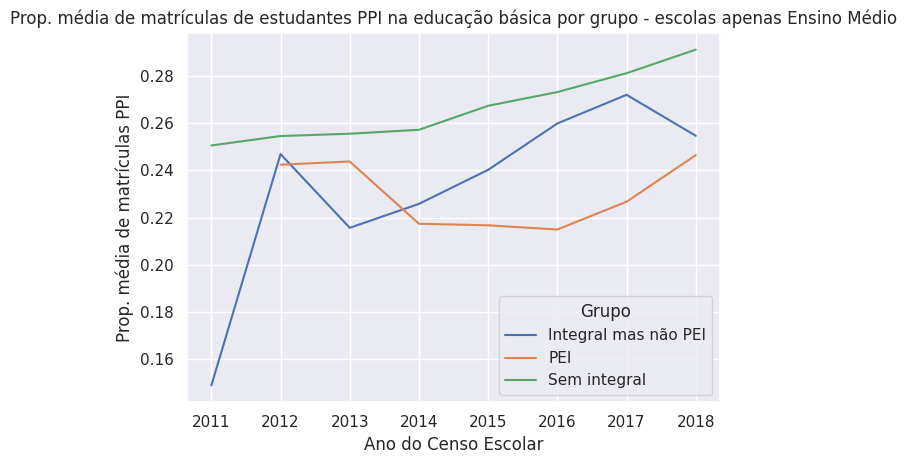

In [25]:
fig, ax = plt.subplots()

for nome_grupo, grupo_df in prop_ppi_por_grupo_ano_apenas_em.groupby('grupo'):
    grupo_df.plot.line(
        x='ano_censo',
        y='proporcao_matriculas_ppi_basica',
        ax=ax,
        label=nome_grupo
    )

ax.set_title('Prop. média de matrículas de estudantes PPI na educação básica por grupo - escolas apenas Ensino Médio')
ax.set_xlabel('Ano do Censo Escolar')
ax.set_ylabel('Prop. média de matrículas PPI')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

save_graph(
    fig,
    'proporcao_matriculas_ppi_por_grupo_ano_apenas_em.png',
)

Vamos trabalhar apenas com ensino médio

In [26]:
df = df[df['apenas_ensino_medio']].reset_index(drop=True).copy()

In [27]:
df['grupo'].value_counts()

grupo
Sem integral            1217
PEI                      449
Integral mas não PEI     148
Name: count, dtype: int64

In [28]:
df['grupo'].value_counts(normalize=True)

grupo
Sem integral            0.670893
PEI                     0.247519
Integral mas não PEI    0.081588
Name: proportion, dtype: float64

In [29]:
def identificacao_anos_tratamento(df):

    df['primeiro_ano_tratamento'] = None
    df['ano_anterior_tratamento'] = None
    df['ultimo_ano_tratamento'] = None
    df_tratamento = df[df['tratamento']].copy()
    escolas = df_tratamento['codigo_escola'].unique()
    for escola in escolas:
        df_escola_tratamento = df_tratamento[df_tratamento['codigo_escola'] == escola]
        primeiro_ano = df_escola_tratamento['ano_censo'].min()
        ultimo_ano = df_escola_tratamento['ano_censo'].max()
        df_escola = df[df['codigo_escola'] == escola]
        idx_escola = df_escola.index
        df.loc[idx_escola, 'primeiro_ano_tratamento'] = primeiro_ano
        ano_anterior = primeiro_ano - 1
        df.loc[idx_escola, 'ano_anterior_ao_tratamento'] = ano_anterior
        df.loc[idx_escola, 'ultimo_ano_tratamento'] = ultimo_ano

    return df


In [30]:
df = identificacao_anos_tratamento(df)

In [31]:
df[df['tratamento']]['primeiro_ano_tratamento'].min()

np.int64(2012)

In [32]:
df[df['tratamento']]['primeiro_ano_tratamento'].max()

np.int64(2018)

In [33]:
df[df['tratamento']]['ano_anterior_ao_tratamento'].min()

np.float64(2011.0)

In [34]:
df[df['tratamento']]['ano_anterior_ao_tratamento'].max()

np.float64(2017.0)

In [35]:
(df['ano_censo'] == df['ano_anterior_ao_tratamento']).any()

np.True_

In [36]:
def tratamento_com_ano_inicial(row):

    if row['tratamento']:
        return True
    
    if row['ano_censo'] == row['primeiro_ano_tratamento']:
        return True
    
    if row['ano_censo'] == row['ano_anterior_ao_tratamento']:
        return True
    
    return False

In [37]:
df['tratamento_com_ano_inicial'] = df.apply(tratamento_com_ano_inicial, axis=1)

In [38]:
df_tratamento_com_ano_inicial = df[df['tratamento_com_ano_inicial']].copy()

In [39]:
(df_tratamento_com_ano_inicial['ano_censo'] == df_tratamento_com_ano_inicial['ano_anterior_ao_tratamento']).any()

np.True_

In [40]:
df_tratamento_com_ano_inicial['grupo'].unique()

array(['Sem integral', 'PEI', 'Integral mas não PEI'], dtype=object)

In [41]:
df_tratamento_com_ano_inicial['grupo'].value_counts()

grupo
PEI                     449
Sem integral             19
Integral mas não PEI     15
Name: count, dtype: int64

In [42]:
df_diferenca_na_proporcao_por_exposicao = []

for escola in df_tratamento_com_ano_inicial['codigo_escola'].unique():
    df_escola = df_tratamento_com_ano_inicial[df_tratamento_com_ano_inicial['codigo_escola'] == escola]
    dados_escola = {

    }
    for i, row in df_escola.iterrows():
        ano = row['ano_censo']
        proporcao = row['proporcao_matriculas_ppi_basica']
        
        if row['ano_anterior_ao_tratamento'] == ano:
            dados_escola['proporcao_inicial'] = proporcao
            
        else:
            dados_escola[ano] = proporcao
    df_diferenca_na_proporcao_por_exposicao.append(dados_escola)

df_diff = pd.DataFrame(df_diferenca_na_proporcao_por_exposicao)


In [43]:
df_diff

,proporcao_inicial,2013,2014,2015,2016,2017,2018,2012
0,0.208889,0.200000,0.201299,0.191011,0.176796,0.155556,0.132948,NaN
1,NaN,0.342629,0.300366,0.312500,0.278592,0.268371,0.230519,0.372222
2,NaN,0.143770,0.130194,0.140299,0.126344,0.133690,0.098930,0.146119
3,0.580762,0.420849,0.351613,0.303514,0.320955,0.314031,0.301518,NaN
4,NaN,0.234597,0.196796,0.200477,0.191874,0.212719,0.308219,0.220238
...,...,...,...,...,...,...,...,...
124,NaN,NaN,NaN,NaN,NaN,NaN,0.425743,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,0.413462,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,0.194444,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,0.294643,NaN


In [44]:
df_diff_inici = pd.DataFrame()
for col in df_diff.columns:

    if col != 'proporcao_inicial':
        df_diff_inici[col] = df_diff[col] - df_diff['proporcao_inicial']

In [45]:
df_diff_inici

,2013,2014,2015,2016,2017,2018,2012
0,-0.008889,-0.007590,-0.017878,-0.032093,-0.053333,-0.075941,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.159913,-0.229149,-0.277248,-0.259807,-0.266731,-0.279244,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
media_da_diferenca_em_relacao_a_proporcao_inicial = df_diff_inici.mean(skipna=True).reset_index().rename({'index' : 'ano', 0 : 'proporção_matriculas_ppi_basica_diff'}, axis=1)

In [47]:
media_da_diferenca_em_relacao_a_proporcao_inicial

,ano,proporção_matriculas_ppi_basica_diff
0,2013,-0.012535
1,2014,-0.017880
2,2015,-0.022158
3,2016,-0.023699
4,2017,-0.027151
5,2018,-0.029159
6,2012,NaN


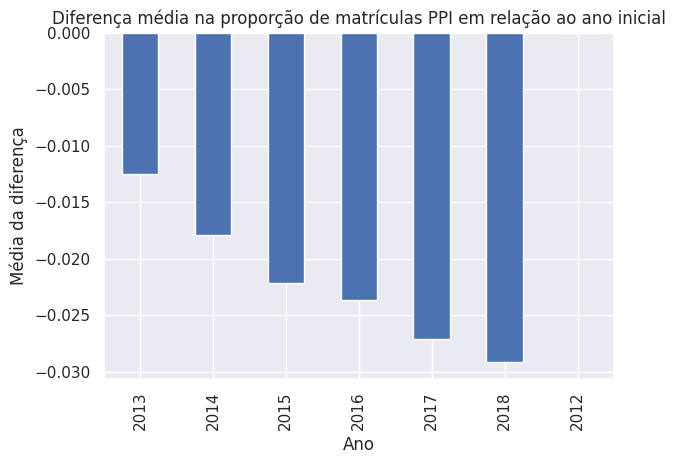

In [48]:
ax = media_da_diferenca_em_relacao_a_proporcao_inicial.plot.bar(
    x='ano',
    y='proporção_matriculas_ppi_basica_diff',
    legend=False
)
ax.set_title('Diferença média na proporção de matrículas PPI em relação ao ano inicial')
ax.set_xlabel('Ano')
ax.set_ylabel('Média da diferença')
plt.tight_layout()
plt.show()

fig = ax.get_figure()

save_graph(fig, 'diferenca_media_na_prop_ppi_em_relacao_situacao_inicial.png')

In [49]:
df['ultimo_ano_tratamento'].max()

np.int64(2018)

In [50]:
df['ultimo_ano_tratamento'].min()

np.int64(2015)

In [51]:
df.loc[df['ultimo_ano_tratamento'].argmin()]

ano_censo                                                               2014
sigla_uf                                                                  SP
nome_municipio                                                    araraquara
codigo_municipio                                                     3503208
codigo_escola                                                       35479342
nome_escola                                                   jardim morumbi
qtd_turmas_ed_basica                                                       6
qtd_matr_ed_basica                                                       152
qtd_matr_medio                                                           152
qtd_matr_fundamental                                                       0
qtd_matr_ed_basica_nao_declarada                                          29
qtd_matr_ed_basica_branca                                                 94
qtd_matr_ed_basica_preta                                                   6

Pode acontecer do ultimo ano de tratmaento não ser 2018 nos casos em que a escola não ficou  mais ativa ou então deixou de ofertar ensino médio. Como é esse caso abaixo, que ela está apenas até 2015 nos dados do censo escolar.

In [52]:
df[df['codigo_escola'] ==35044180]

,ano_censo,sigla_uf,nome_municipio,codigo_municipio,codigo_escola,nome_escola,qtd_turmas_ed_basica,qtd_matr_ed_basica,qtd_matr_medio,qtd_matr_fundamental,...,integral_medio_nao_tratamento,grupo,qtd_matriculas_ppi_basica,proporcao_matriculas_ppi_basica,apenas_ensino_medio,primeiro_ano_tratamento,ano_anterior_tratamento,ultimo_ano_tratamento,ano_anterior_ao_tratamento,tratamento_com_ano_inicial


In [53]:
df_relacao_anos_pei_diferenca_situacao_inicial = []

for escola in df_tratamento_com_ano_inicial['codigo_escola'].unique():
    df_escola = df_tratamento_com_ano_inicial[df_tratamento_com_ano_inicial['codigo_escola'] == escola]
    dados_escola = {

    }
    for i, row in df_escola.iterrows():
        ano = row['ano_censo']
        proporcao = row['proporcao_matriculas_ppi_basica']
        
        if row['ano_anterior_ao_tratamento'] == ano:
            dados_escola['proporcao_inicial'] = proporcao

        if row['ano_censo'] == row['ultimo_ano_tratamento']:
            dados_escola['proporcao_final'] = proporcao
            
        ultimo_ano = row['ultimo_ano_tratamento']
        primeiro_ano = row['primeiro_ano_tratamento']
        anos_tratamento = ultimo_ano - primeiro_ano + 1

        dados_escola['anos_tratamento'] = anos_tratamento

        

    df_relacao_anos_pei_diferenca_situacao_inicial.append(dados_escola)

df_relacao_anos_pei_diferenca_situacao_inicial = pd.DataFrame(df_relacao_anos_pei_diferenca_situacao_inicial)

In [54]:
df_relacao_anos_pei_diferenca_situacao_inicial.head()

,proporcao_inicial,anos_tratamento,proporcao_final
0,0.208889,6,0.132948
1,NaN,7,0.230519
2,NaN,7,0.098930
3,0.580762,6,0.301518
4,NaN,7,0.308219


In [55]:
df_relacao_anos_pei_diferenca_situacao_inicial['diferenca_proporcao'] = df_relacao_anos_pei_diferenca_situacao_inicial['proporcao_final'] - df_relacao_anos_pei_diferenca_situacao_inicial['proporcao_inicial']
df_relacao_anos_pei_diferenca_situacao_inicial['diferenca_proporcao'].mean()

np.float64(-0.026429777694305615)

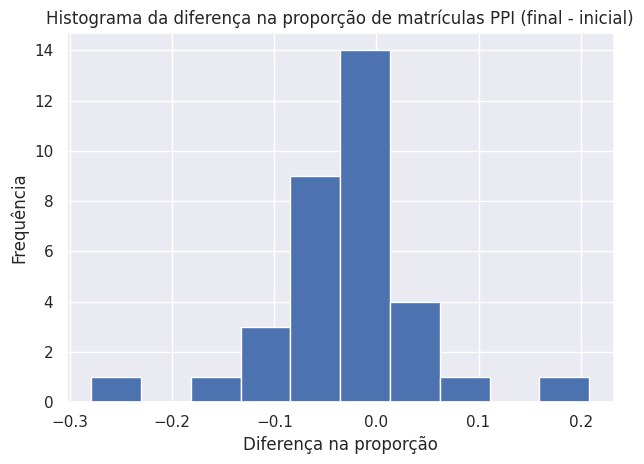

In [56]:
ax = df_relacao_anos_pei_diferenca_situacao_inicial['diferenca_proporcao'].plot.hist()
plt.title('Histograma da diferença na proporção de matrículas PPI (final - inicial)')
plt.xlabel('Diferença na proporção')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

fig = ax.get_figure()
save_graph(fig, 'histograma_diferenca_proporcao_matriculas_ppi_final_inicial.png')

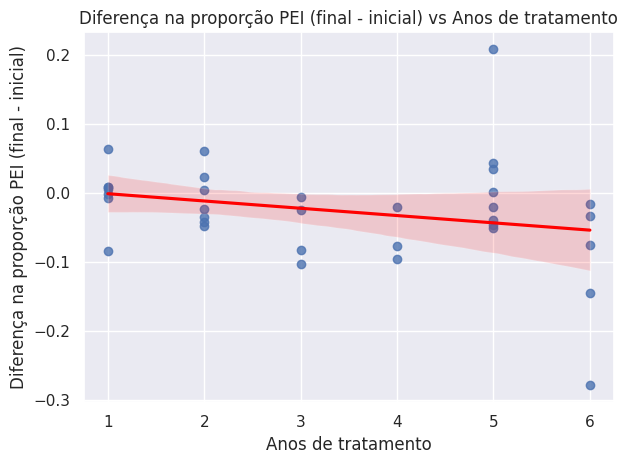

In [57]:
ax = sns.regplot(
    data=df_relacao_anos_pei_diferenca_situacao_inicial,
    x='anos_tratamento',
    y='diferenca_proporcao',
    scatter=True,
    line_kws={'color': 'red'}
)
ax.set_title('Diferença na proporção PEI (final - inicial) vs Anos de tratamento')
ax.set_xlabel('Anos de tratamento')
ax.set_ylabel('Diferença na proporção PEI (final - inicial)')
plt.tight_layout()
fig = ax.get_figure()
save_graph(fig, 'scatter_diferenca_proporcao_vs_anos_tratamento_regressao.png')

In [58]:
import statsmodels.api as sm

# Remove linhas com valores nulos nas colunas usadas
df_reg = df_relacao_anos_pei_diferenca_situacao_inicial.dropna(subset=['diferenca_proporcao', 'anos_tratamento'])

X = df_reg[['anos_tratamento']]
X = sm.add_constant(X)
y = df_reg['diferenca_proporcao']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     diferenca_proporcao   R-squared:                       0.064
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     2.199
Date:                 Sun, 15 Jun 2025   Prob (F-statistic):              0.148
Time:                         19:49:33   Log-Likelihood:                 40.979
No. Observations:                   34   AIC:                            -77.96
Df Residuals:                       32   BIC:                            -74.91
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0093      

In [59]:
df.columns

Index(['ano_censo', 'sigla_uf', 'nome_municipio', 'codigo_municipio',
       'codigo_escola', 'nome_escola', 'qtd_turmas_ed_basica',
       'qtd_matr_ed_basica', 'qtd_matr_medio', 'qtd_matr_fundamental',
       'qtd_matr_ed_basica_nao_declarada', 'qtd_matr_ed_basica_branca',
       'qtd_matr_ed_basica_preta', 'qtd_matr_ed_basica_parda',
       'qtd_matr_ed_basica_amarela', 'qtd_matr_ed_basica_indigena',
       'qtd_matriculas_fundamental_integral',
       'qtd_matriculas_fundamental_anos_iniciais_integral',
       'qtd_matriculas_fundamental_anos_finais_integral',
       'qtd_matriculas_medio_integral', 'coordenadas', 'is_PEI', '_merge',
       'total_matriculas_basica_integral', 'possui_integral',
       'total_matriculas_fundamental_integral', 'possui_integral_medio',
       'is_PEI_and_possui_medio_integral', 'primeiro_ano_integral_medio',
       'ultimo_ano_integral_medio', 'anos_integral_medio',
       'ofertou_integral_de_forma_continua', 'prop_matriculas_medio_integral',
       

In [60]:
df_boxplots = []

escolas = set(df['codigo_escola'].unique())

escolas_tratamento = set(df[df['tratamento']]['codigo_escola'].unique())
escolas_sem_tratamento = escolas - escolas_tratamento

escolas_integral = set(df[df['possui_integral']]['codigo_escola'].unique())
escolas_integral_sem_tratamento = escolas_integral - escolas_tratamento
escolas_sem_tratamento_sem_integral = escolas_sem_tratamento - escolas_integral

dados_final = []
for escola in escolas:
    
    df_escola = df[df['codigo_escola'] == escola]

    ano_inicial = df_escola['ano_censo'].min()
    ano_final = df_escola['ano_censo'].max()

    dados_escola = {
        'codigo_escola': escola,
        'ano_inicial': ano_inicial,
        'ano_final': ano_final,
        'grupo' : None
    }

    if escola in escolas_integral_sem_tratamento:
        dados_escola['grupo'] = '2. Integral mas não PEI'

    if escola in escolas_tratamento:
        dados_escola['grupo'] = '3. PEI'

    if escola in escolas_sem_tratamento_sem_integral:
        dados_escola['grupo'] = '1. Sem integral'

    for i, row in df_escola.iterrows():
        
        ano_row = row['ano_censo']
        if ano_row == ano_inicial:
            proporcao_inicial = row['proporcao_matriculas_ppi_basica']
            dados_escola['proporcao_inicial'] = proporcao_inicial
        elif ano_row == ano_final:
            proporcao_final = row['proporcao_matriculas_ppi_basica']
            dados_escola['proporcao_final'] = proporcao_final

    dados_final.append(dados_escola)

        

In [61]:
df_final = pd.DataFrame(dados_final)

In [62]:
df_final.head()

,codigo_escola,ano_inicial,ano_final,grupo,proporcao_inicial,proporcao_final
0,35012609,2013,2018,1. Sem integral,0.047794,0.182674
1,35923977,2014,2018,2. Integral mas não PEI,0.335810,0.364205
2,35014667,2013,2018,1. Sem integral,0.186885,0.158273
3,35022861,2011,2018,2. Integral mas não PEI,0.328841,0.503597
4,35016718,2015,2018,1. Sem integral,0.147460,0.155556


In [63]:
df_final['codigo_escola'].duplicated().any()

np.False_

In [64]:
df_final['grupo'].isnull().any()

np.False_

In [65]:
df_final['diff_proporcao'] = df_final['proporcao_final'] - df_final['proporcao_inicial']


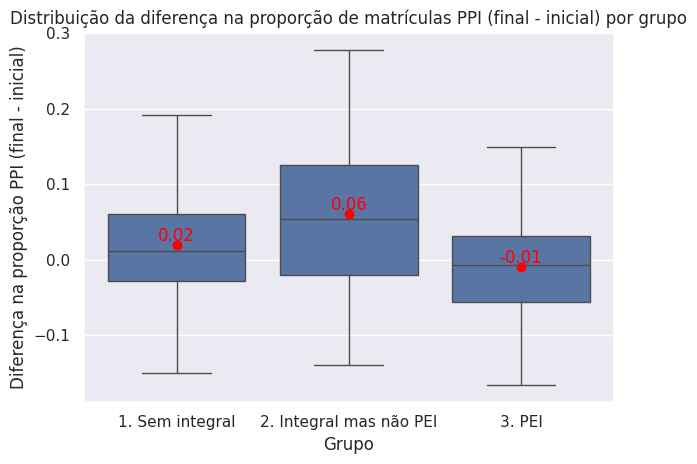

In [66]:
ax = sns.boxplot(
    data=df_final,
    x='grupo',
    y='diff_proporcao',
    showfliers=False
)

# Calcula médias por grupo
medias = df_final.groupby('grupo')['diff_proporcao'].mean()

# Adiciona as médias ao gráfico
for i, (grupo, media) in enumerate(medias.items()):
    ax.scatter(i, media, color='red', zorder=5)  # ponto vermelho
    ax.text(i, media, f'{media:.2f}', color='red', ha='center', va='bottom')  # texto

plt.title('Distribuição da diferença na proporção de matrículas PPI (final - inicial) por grupo')
plt.xlabel('Grupo')
plt.ylabel('Diferença na proporção PPI (final - inicial)')
plt.tight_layout()
plt.show()

fig = ax.get_figure()
save_graph(fig, 'boxplot_diferenca_proporcao_matriculas_ppi_por_grupo.png')

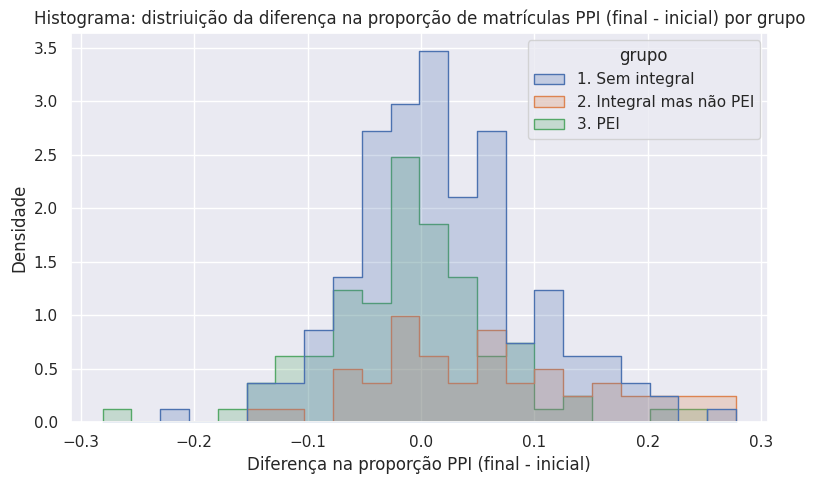

In [67]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df_final, x='diff_proporcao', hue='grupo', kde=False, element='step', stat='density')
plt.title('Histograma: distriuição da diferença na proporção de matrículas PPI (final - inicial) por grupo')
plt.xlabel('Diferença na proporção PPI (final - inicial)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

fig = ax.get_figure()

save_graph(fig, 'histogram_diferenca.png')


In [68]:
pei =  df_final[df_final['grupo'] == '3. PEI']
pei = pei.dropna(subset=['diff_proporcao'])

integral_nao_pei  = df_final[df_final['grupo'] == '2. Integral mas não PEI']
integral_nao_pei = integral_nao_pei.dropna(subset=['diff_proporcao'])

sem_integral = df_final[df_final['grupo'] == '1. Sem integral']
sem_integral = sem_integral.dropna(subset=['diff_proporcao'])

In [69]:
from scipy.stats import ttest_ind


stat, pval = ttest_ind(pei['diff_proporcao'], integral_nao_pei['diff_proporcao'], equal_var=False)  # Welch’s t-test

print(f"t = {stat:.4f}, p = {pval:.4f}")

t = -4.3500, p = 0.0000


In [70]:
from scipy.stats import ttest_ind


stat, pval = ttest_ind(pei['diff_proporcao'], sem_integral['diff_proporcao'], equal_var=False)  # Welch’s t-test

print(f"t = {stat:.4f}, p = {pval:.4f}")

t = -2.9262, p = 0.0038
